In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy import signal

#  Lo que se ejecutaria en el dispositivo SDR

In [2]:
nfft = 1024
tiempo = 20
x=numpy.fromfile('espectro', dtype=numpy.float32, count=-1, sep='')
ts = tiempo/(len(x)/nfft)

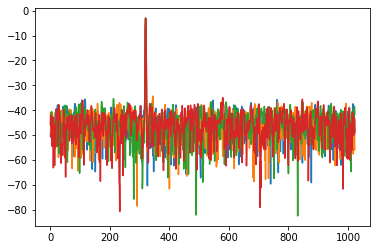

In [3]:
for i in range(4):
    plt.plot(x[i*nfft:(i+1)*nfft])

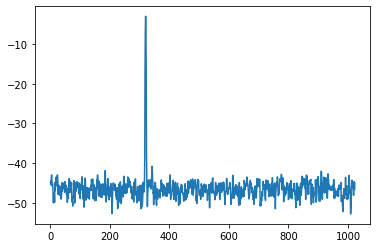

In [4]:
y = numpy.zeros(1024)
for i in range(10):
    y = x[i*nfft:(i+1)*nfft] + y
plt.plot(y/10)


In [5]:
def caracteristicas(x, nfft):
    """ Esta funcion extrae caracteristicas basicas
    del espectro sensado"""
    frames = int(len(x)/nfft)
    min_ = numpy.array([])
    max_ = numpy.array([])
    ener_ = numpy.array([])
    for i in range(frames-1):
        min_= numpy.append(min_, numpy.min(x[i*nfft:nfft*(i+1)]))
        max_= numpy.append(max_, numpy.max(x[i*nfft:nfft*(i+1)]))
        ener_ = numpy.append(ener_, numpy.sum(10**((x[nfft*i:nfft*(i+1)])/10.0)))
    #ener_ = 10*numpy.log10(ener_)
    return min_, max_, ener_

In [6]:
min_, max_, ener_ = caracteristicas(x, nfft)

# Mirando el analisis desde el procesamiento

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
print(numpy.array([ener_, min_, max_]).T.shape)

(1718, 3)


In [11]:
df = pd.DataFrame(data=numpy.array([10*numpy.log10(ener_), min_, max_]).T, columns=["ener_", "min_", "max_"])

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 3 columns):
ener_    1718 non-null float64
min_     1718 non-null float64
max_     1718 non-null float64
dtypes: float64(3)
memory usage: 40.3 KB


,ener_,min_,max_
count,1718.000000,1718.000000,1718.000000
mean,29.885070,-34.544703,10.561903
std,11.031860,16.541209,5.093338
min,0.003517,-100.562218,-3.158424
25%,33.748319,-34.230820,11.652880
50%,33.934901,-28.888644,12.223191
75%,34.099532,-25.186977,12.827769
max,34.747981,-17.084002,15.655535


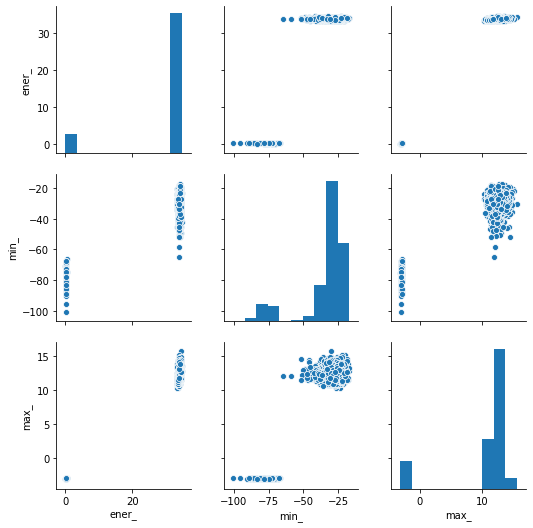

In [14]:
sns.pairplot(df)

# Distribuciones

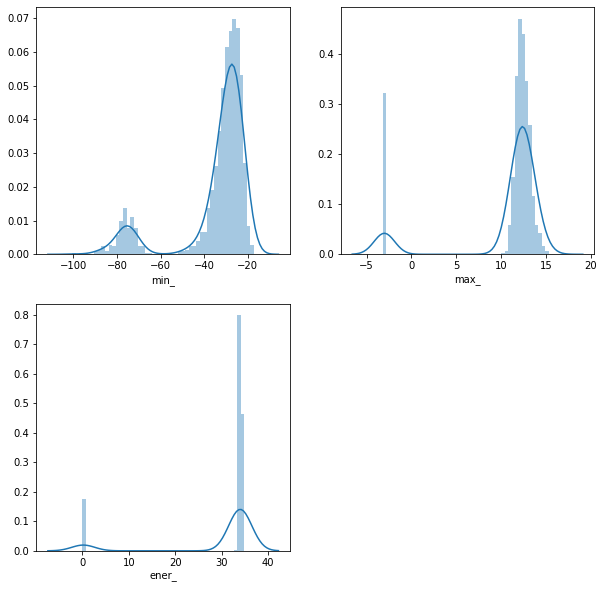

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["min_"])
plt.subplot(2,2,2)
sns.distplot(df["max_"])
plt.subplot(2,2,3)
sns.distplot(df["ener_"])

In [15]:
df.corr()

,ener_,min_,max_
ener_,1.000000,0.942779,0.990644
min_,0.942779,1.000000,0.933356
max_,0.990644,0.933356,1.000000


In [18]:
u = numpy.array([1,2,3])
print(numpy.sum(10**u))

1110
